## Predict the well-being score of study participants based on their screen time using the provided datasets, including data exploration, data visualisation methods, and linear regression modelling.

In [21]:
# Import the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
# Read dataset from the cleaned .csv file into a DataFrame 
df = pd.read_csv("merged_dataset_clean.csv")
df.head()

,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,1000001,1,0,0,2.19,1.77,1.74,1.01,3.52,2.91,...,3.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,4.00,4.00
1,1000002,0,1,0,0.50,0.50,0.00,0.00,1.00,0.50,...,4.00,4.00,5.00,5.00,3.00,4.00,5.00,5.00,4.00,4.00
2,1000003,0,0,1,1.00,0.50,0.00,0.00,2.00,2.00,...,4.00,3.00,3.00,2.00,2.00,2.00,5.00,3.00,3.00,3.00
3,1000004,0,0,1,3.00,1.00,2.00,0.00,3.00,2.00,...,2.00,4.00,4.00,3.00,4.00,4.00,5.00,4.00,4.00,4.00
4,1000005,0,0,1,4.00,2.00,0.00,0.00,4.00,3.00,...,2.00,2.00,2.00,1.00,3.00,1.00,3.00,4.00,2.00,2.00


In [4]:
df.tail()

,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
120110,1120111,1,0,1,7.0,6.0,7.0,6.0,3.0,1.0,...,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,2.0,4.0
120111,1120112,1,0,1,3.0,4.0,7.0,7.0,6.0,7.0,...,1.0,1.0,3.0,2.0,4.0,3.0,2.0,3.0,4.0,3.0
120112,1120113,1,0,1,2.0,0.0,4.0,2.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
120113,1120114,1,0,1,4.0,2.0,5.0,3.0,0.5,0.5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
120114,1120115,1,0,1,0.0,0.0,7.0,6.0,0.0,0.0,...,1.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0



### 1 . Data Exploration: Analyzing and understanding the data structure, checking for missing values, duplicates, or outliers, and performing descriptive statistics.

In [5]:
# Display the structure of the dataset
print("Data Structure:")
print(df.info())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120115 entries, 0 to 120114
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        120115 non-null  int64  
 1   gender    120115 non-null  int64  
 2   minority  120115 non-null  int64  
 3   deprived  120115 non-null  int64  
 4   C_we      120115 non-null  float64
 5   C_wk      120115 non-null  float64
 6   G_we      120115 non-null  float64
 7   G_wk      120115 non-null  float64
 8   S_we      120115 non-null  float64
 9   S_wk      120115 non-null  float64
 10  T_we      120115 non-null  float64
 11  T_wk      120115 non-null  float64
 12  Optm      120115 non-null  float64
 13  Usef      120115 non-null  float64
 14  Relx      120115 non-null  float64
 15  Intp      120115 non-null  float64
 16  Engs      120115 non-null  float64
 17  Dealpr    120115 non-null  float64
 18  Thcklr    120115 non-null  float64
 19  Goodme    120115 non-null  f

In [ ]:
# Get the shape of the DataFrame
df.shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

In [6]:
# Check if there's any missing values or abnormal data and check datatypes of all variables
#df.info()
# Check for missing values
missing_values = df.isna().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
ID          0
gender      0
minority    0
deprived    0
C_we        0
C_wk        0
G_we        0
G_wk        0
S_we        0
S_wk        0
T_we        0
T_wk        0
Optm        0
Usef        0
Relx        0
Intp        0
Engs        0
Dealpr      0
Thcklr      0
Goodme      0
Clsep       0
Conf        0
Mkmind      0
Loved       0
Intthg      0
Cheer       0
dtype: int64


In [7]:
# Check for any duplicates
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")


Number of duplicate rows: 0


In [8]:
# Check for outliers in screen time variables (expect range from 0 to 7)
screen_time_columns = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
screen_time_outliers = df[screen_time_columns].apply(lambda x: x[(x < 0) | (x > 7)].count())
print("\nOutliers in Screen Time Columns:")
print(screen_time_outliers)


Outliers in Screen Time Columns:
C_we    0
C_wk    0
G_we    0
G_wk    0
S_we    0
S_wk    0
T_we    0
T_wk    0
dtype: int64


In [9]:
# Check for outliers in well-being scores (expect range from 1 to 5)
wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 
                     'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
wellbeing_outliers = df[wellbeing_columns].apply(lambda x: x[(x < 1) | (x > 5)].count())
print("\nOutliers in Well-being Columns:")
print(wellbeing_outliers)


Outliers in Well-being Columns:
Optm      0
Usef      0
Relx      0
Intp      0
Engs      0
Dealpr    0
Thcklr    0
Goodme    0
Clsep     0
Conf      0
Mkmind    0
Loved     0
Intthg    0
Cheer     0
dtype: int64


In [ ]:
# Function to find outliers in each column based on IQR
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return column[(column < lower_bound) | (column > upper_bound)]

# Function to print out the number of outliers, excluding binary columns
def print_outlier_counts(dataframe):
    # Skip columns that are binary or IDs
    columns_to_check = dataframe.columns.difference(['ID', 'gender', 'minority', 'deprived'])
    
    for column in columns_to_check:
        if dataframe[column].dtype in ['float64', 'int64']:  # Checks if the column is numeric
            outliers = find_outliers(dataframe[column])
            print(f"The column '{column}' has {len(outliers)} outliers.")
            
# Check for outliers in screen time and well-being scores
print_outlier_counts(df)

# Visualize the distributions for screen time variables
screen_time_columns = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
for column in screen_time_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualize the distributions for well-being variables
wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 
                     'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
for column in wellbeing_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [10]:
#Descriptive statistics

# Assign df to sample for analysis
sample = df

# List of screen time columns
screen_time_columns = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']

# Function to generate a statistics summary for screen time columns
def statistics_summary(sample):
    summary_stats = sample.describe()
    summary_stats.loc['median'] = sample.median()
    summary_stats.loc['variance'] = sample.var()
    summary_stats.loc['range'] = sample.max() - sample.min()
    summary_stats.loc['IQR'] = sample.quantile(0.75) - sample.quantile(0.25)
    return summary_stats

# Extract only screen time data
screen_time_data = sample[screen_time_columns]

# Statistics summary of the screen time data
screen_time_stats = statistics_summary(screen_time_data)

# Display summary statistics for screen time columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Formatting for easier reading
print(screen_time_stats)

              C_we      C_wk      G_we      G_wk      S_we      S_wk  \
count    120115.00 120115.00 120115.00 120115.00 120115.00 120115.00   
mean          2.19      1.77      1.74      1.01      3.52      2.91   
std           2.02      1.69      2.11      1.51      2.43      2.27   
min           0.00      0.00      0.00      0.00      0.00      0.00   
25%           0.50      0.50      0.00      0.00      1.00      1.00   
50%           2.00      1.00      1.00      0.50      3.52      2.91   
75%           3.00      2.00      3.00      1.01      6.00      4.00   
max           7.00      7.00      7.00      7.00      7.00      7.00   
median        2.00      1.00      1.00      0.50      3.52      2.91   
variance      4.08      2.84      4.44      2.28      5.88      5.16   
range         7.00      7.00      7.00      7.00      7.00      7.00   
IQR           2.50      1.50      3.00      1.01      5.00      3.00   

              T_we      T_wk  
count    120115.00 120115.00  
m

In [11]:
# List of well-being score columns
wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 
                     'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Function to generate a statistics summary for well-being score columns
def statistics_summary(sample):
    summary_stats = sample.describe()
    summary_stats.loc['median'] = sample.median()
    summary_stats.loc['variance'] = sample.var()
    summary_stats.loc['range'] = sample.max() - sample.min()
    summary_stats.loc['IQR'] = sample.quantile(0.75) - sample.quantile(0.25)
    return summary_stats

# Extract only well-being score data
wellbeing_data = sample[wellbeing_columns]

# Statistics summary of the well-being score data
wellbeing_stats = statistics_summary(wellbeing_data)

# Display summary statistics for well-being score columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Formatting for easier reading
print(wellbeing_stats)


              Optm      Usef      Relx      Intp      Engs    Dealpr  \
count    120115.00 120115.00 120115.00 120115.00 120115.00 120115.00   
mean          3.28      3.11      3.10      3.27      3.05      3.37   
std           0.92      0.88      0.94      0.94      0.99      0.97   
min           1.00      1.00      1.00      1.00      1.00      1.00   
25%           3.00      3.00      3.00      3.00      2.00      3.00   
50%           3.28      3.00      3.00      3.27      3.00      3.37   
75%           4.00      4.00      4.00      4.00      4.00      4.00   
max           5.00      5.00      5.00      5.00      5.00      5.00   
median        3.28      3.00      3.00      3.27      3.00      3.37   
variance      0.85      0.78      0.88      0.89      0.99      0.94   
range         4.00      4.00      4.00      4.00      4.00      4.00   
IQR           1.00      1.00      1.00      1.00      2.00      1.00   

            Thcklr    Goodme     Clsep      Conf    Mkmind     

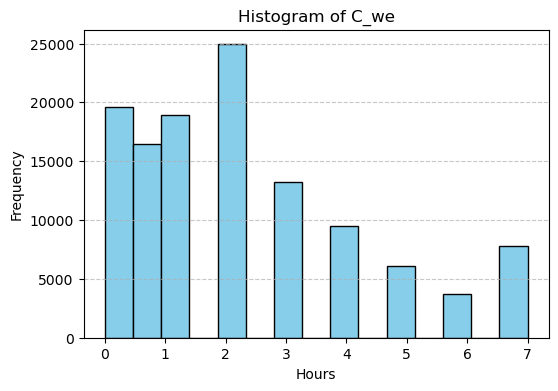

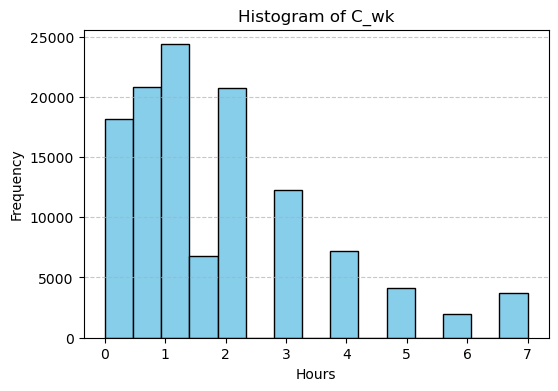

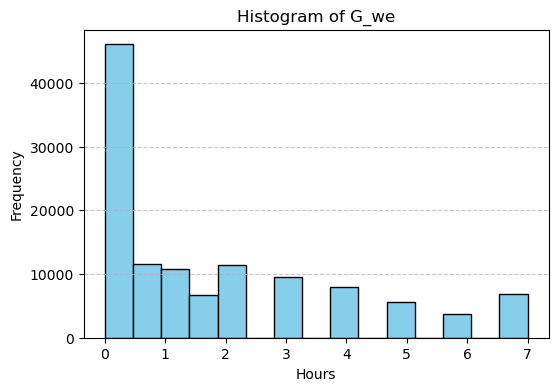

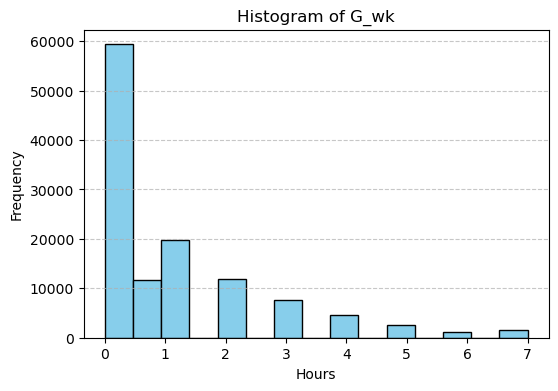

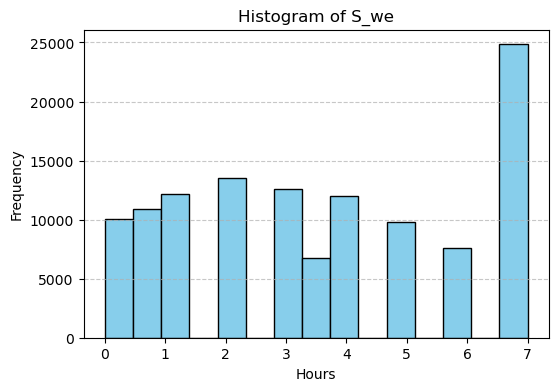

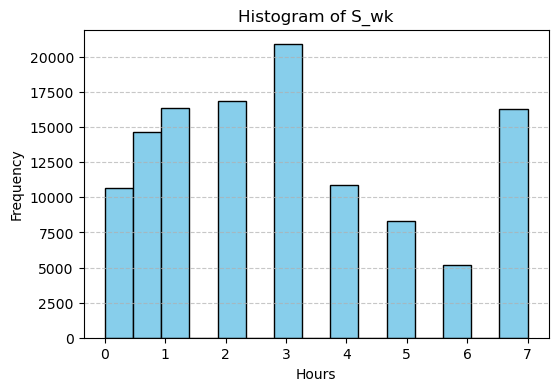

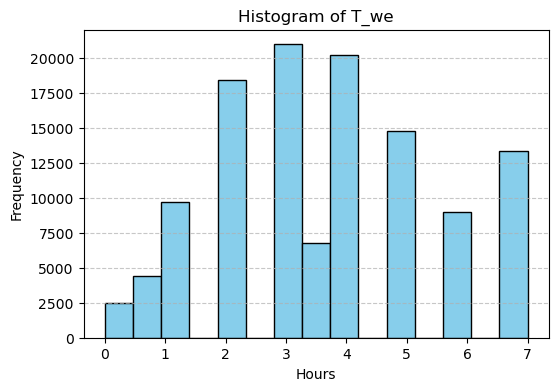

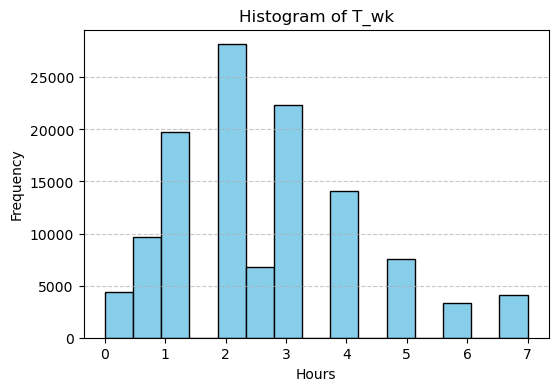

In [33]:
# List of screen time columns
screen_time_columns = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']

# Plot histograms for each screen time variable
for column in screen_time_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Hours')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### 2. Feature Engineering: Creatively deriving new variables that can enhance the predictive power of the model without altering the original data.
#### - Calculating total screen time (summing all screen-related variables).
#### - Creating screen time ratios (weekend to weekday screen time).
#### - Generating composite well-being scores by aggregating the well-being indicators.

In [36]:
# List of screen time columns
screen_time_columns_weekdays = ['C_wk', 'G_wk', 'S_wk', 'T_wk']  # Weekday screen time columns
screen_time_columns_weekends = ['C_we', 'G_we', 'S_we', 'T_we']  # Weekend screen time columns

# Calculate total Screen Time
df['total_screen_time_wk'] = df[screen_time_columns_weekdays].sum(axis=1)
df['total_screen_time_we'] = df[screen_time_columns_weekends].sum(axis=1)
df['total_screen_time'] = df['total_screen_time_wk'] + df['total_screen_time_we']

# Calculate Screen Time Ratios (weekend to weekday screen time)
df['screen_time_ratio_computer'] = df['C_we'] / (df['C_wk'] + 1)
df['screen_time_ratio_gaming'] = df['G_we'] / (df['G_wk'] + 1)
df['screen_time_ratio_smartphone'] = df['S_we'] / (df['S_wk'] + 1)
df['screen_time_ratio_tv'] = df['T_we'] / (df['T_wk'] + 1)

# Composite Well-Being Score (sum of well-being indicators)
wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 
                     'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
df['composite_wellbeing_score'] = df[wellbeing_columns].sum(axis=1)

print(df[['total_screen_time_wk', 'total_screen_time_we', 'total_screen_time', 
          'screen_time_ratio_computer', 'screen_time_ratio_gaming', 
          'screen_time_ratio_smartphone', 'screen_time_ratio_tv', 
          'composite_wellbeing_score']].head())

   total_screen_time_wk  total_screen_time_we  total_screen_time  \
0                  8.26                 11.10              19.36   
1                  1.50                  2.50               4.00   
2                  4.50                  6.00              10.50   
3                  5.00                 11.00              16.00   
4                 10.00                 15.00              25.00   

   screen_time_ratio_computer  screen_time_ratio_gaming  \
0                        0.79                      0.87   
1                        0.33                      0.00   
2                        0.67                      0.00   
3                        1.50                      2.00   
4                        1.33                      0.00   

   screen_time_ratio_smartphone  screen_time_ratio_tv  \
0                          0.90                  1.02   
1                          0.67                  0.67   
2                          0.67                  1.00   
3       

### 3. Data Visualization: Explore relationships between screen time and well-being indicators

#### - Pandas profiling report that summarises dataframe's content using various descriptive statistics visualisations
#### - Correlation Heatmap: This will show the correlations between screen time variables and well-being indicators, helping identify strong relationships.
#### - Scatter Plots: These will visualize the relationship between total screen time and the composite well-being score.
#### - Box Plots: These will help examine the distribution of well-being scores across different screen time categories.

In [15]:
# Pandas Profiling Report

# Read the dataset
df = pd.read_csv('merged_dataset_clean.csv')

# Generate the Pandas Profile Report
prof = ProfileReport(df, title="Well-being and Screen Time Profiling Report", explorative=True)

# Save the profiling report as an HTML file
prof.to_file(output_file='wellbeing_screen_time_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


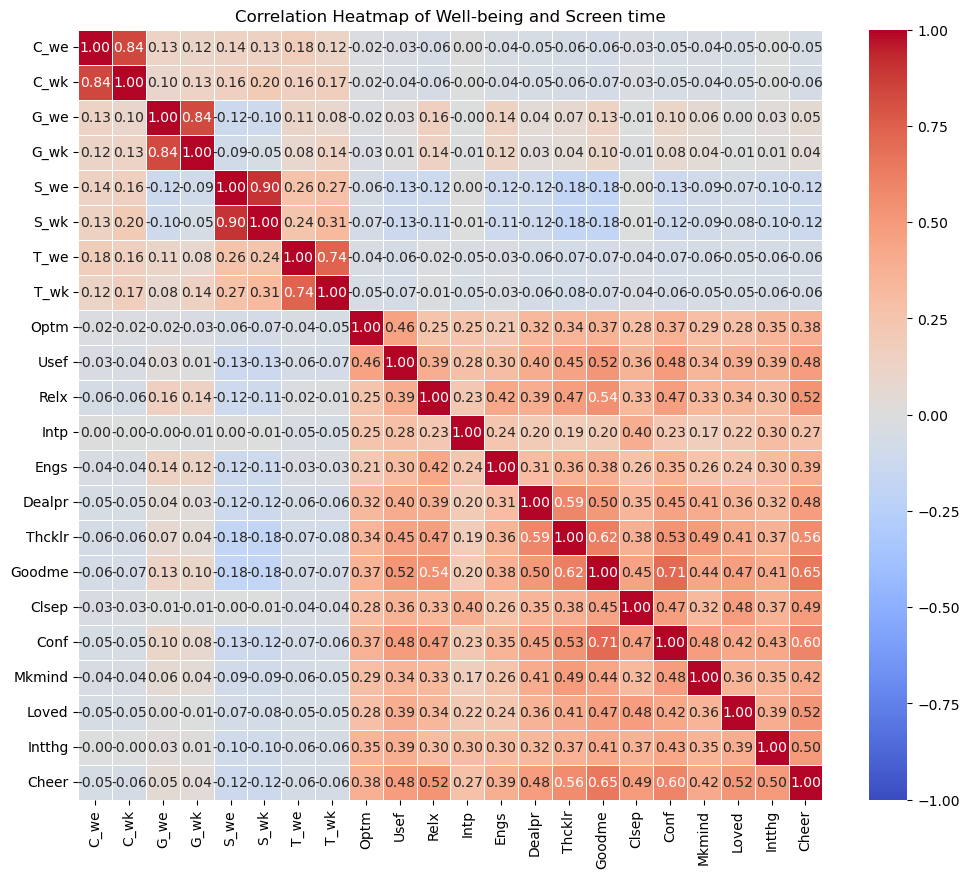

In [22]:
# Correlation Heatmap

# Exclude the first 4 columns: 'ID', 'gender', 'minority', 'deprived'
columns_to_exclude = ['ID', 'gender', 'minority', 'deprived']
df = df.drop(columns=columns_to_exclude)
    
# Generate a correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Well-being and Screen time')
plt.show()

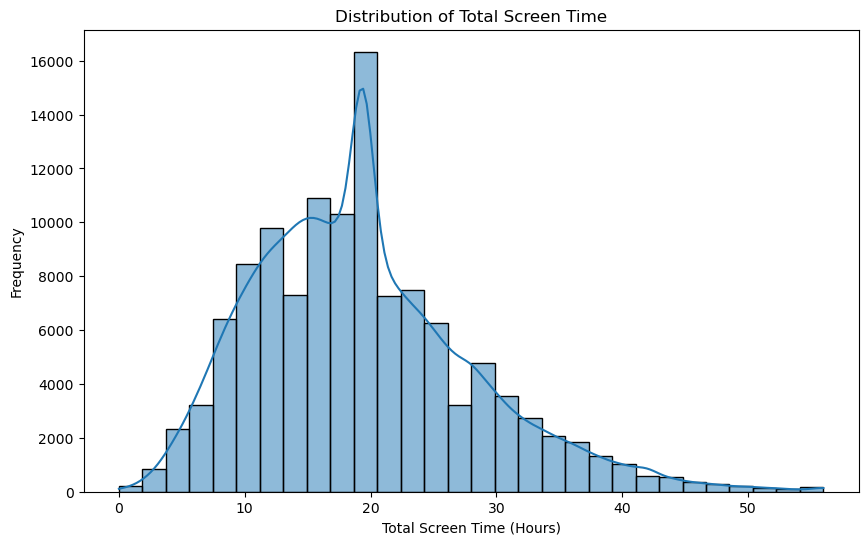

In [20]:
# Histogram Plot: Distribution of total screen time
plt.figure(figsize=(10, 6))
sns.histplot(df['total_screen_time'], bins=30, kde=True)
plt.title('Distribution of Total Screen Time')
plt.xlabel('Total Screen Time (Hours)')
plt.ylabel('Frequency')
plt.show()

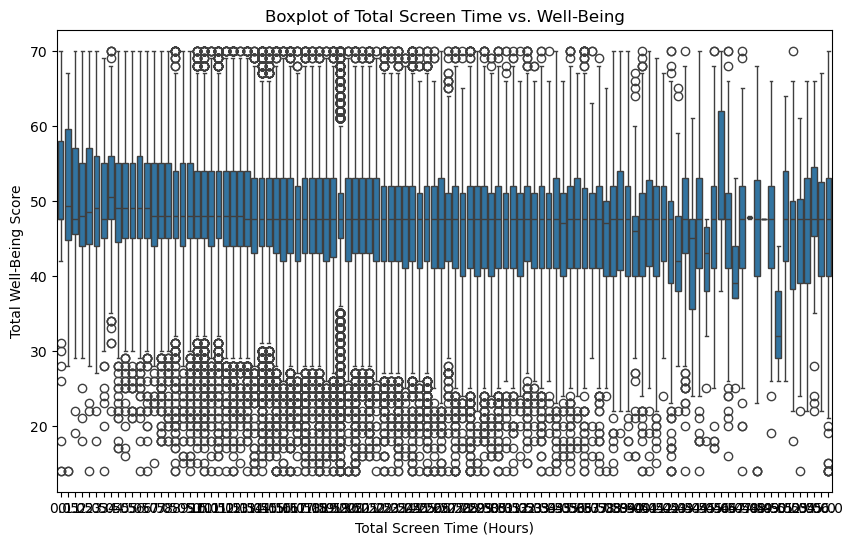

In [21]:
# Boxplot of screen time and well-being scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='total_screen_time', y='composite_wellbeing_score', data=df)
plt.title('Boxplot of Total Screen Time vs. Well-Being')
plt.xlabel('Total Screen Time (Hours)')
plt.ylabel('Total Well-Being Score')
plt.show()

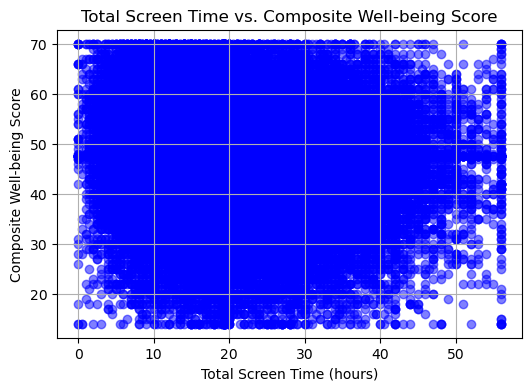

In [24]:
# Scatter Plot: Total Screen Time and composite Well-being Score

plt.figure(figsize=(6, 4))
plt.scatter(df['total_screen_time'], df['composite_wellbeing_score'], alpha=0.5, color='blue')
plt.title('Total Screen Time vs. Composite Well-being Score')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Composite Well-being Score')
plt.grid(True)
plt.show()

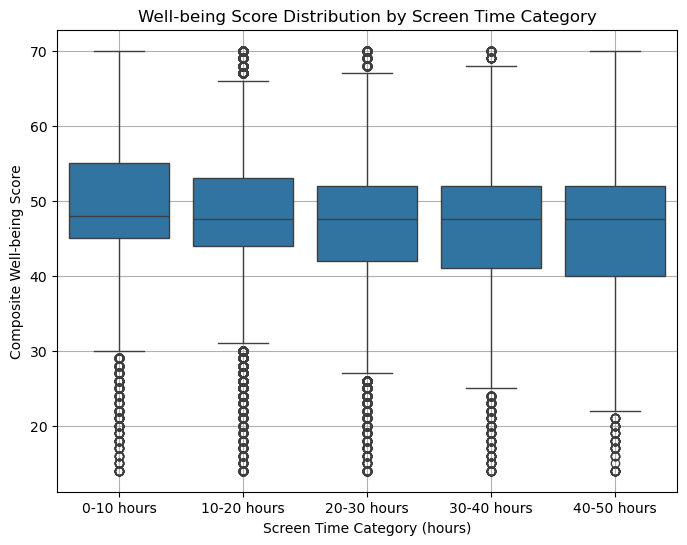

In [25]:
# Box Plot: Well-being score distribution for different screen time categories

# Create screen time categories based on total screen time
df['screen_time_category'] = pd.cut(df['total_screen_time'], bins=[0, 10, 20, 30, 40, 50], 
                                    labels=['0-10 hours', '10-20 hours', '20-30 hours', 
                                            '30-40 hours', '40-50 hours'])

# Box plot for each screen time category
plt.figure(figsize=(8, 6))
sns.boxplot(x='screen_time_category', y='composite_wellbeing_score', data=df)
plt.title('Well-being Score Distribution by Screen Time Category')
plt.xlabel('Screen Time Category (hours)')
plt.ylabel('Composite Well-being Score')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

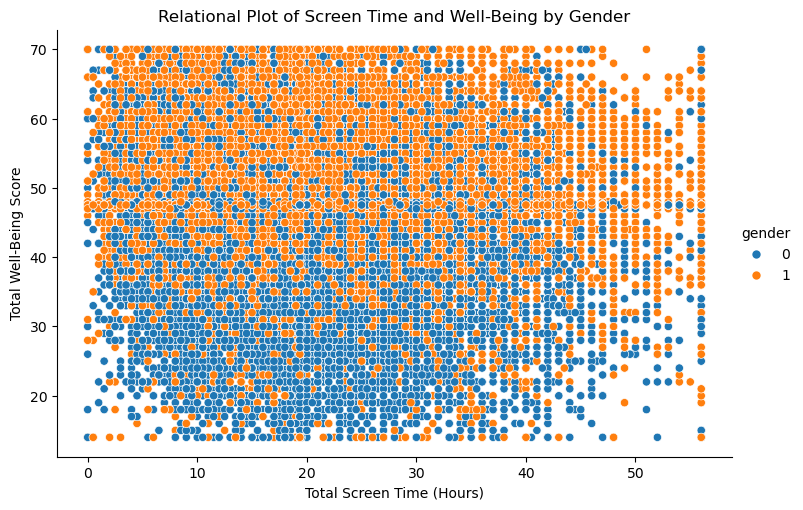

In [22]:
# Relational plot: Screen time and well-being with hue for gender
plt.figure(figsize=(10, 6))
sns.relplot(x='total_screen_time', y='composite_wellbeing_score', hue='gender', data=df, aspect=1.5)
plt.title('Relational Plot of Screen Time and Well-Being by Gender')
plt.xlabel('Total Screen Time (Hours)')
plt.ylabel('Total Well-Being Score')
plt.show()


<Figure size 1000x600 with 0 Axes>

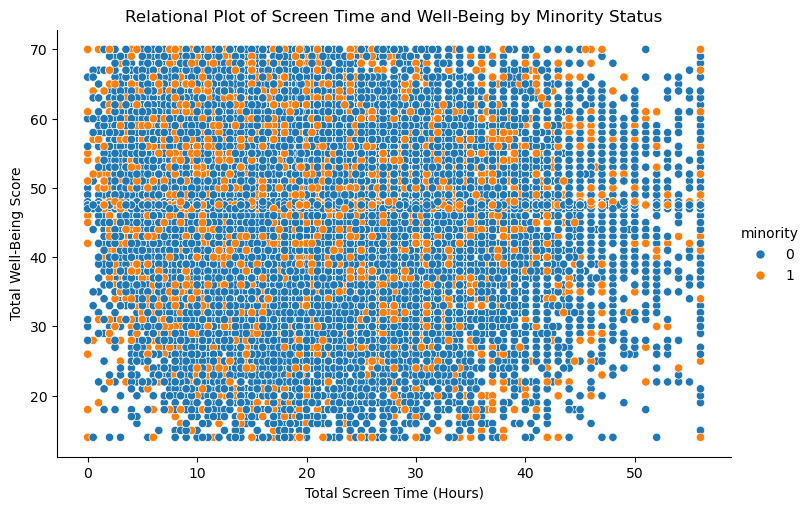

In [11]:
# Relational plot: Screen time and well-being with hue for minority
plt.figure(figsize=(10, 6))
sns.relplot(x='total_screen_time', y='composite_wellbeing_score', hue='minority', data=df, aspect=1.5)
plt.title('Relational Plot of Screen Time and Well-Being by Minority Status')
plt.xlabel('Total Screen Time (Hours)')
plt.ylabel('Total Well-Being Score')
plt.show()

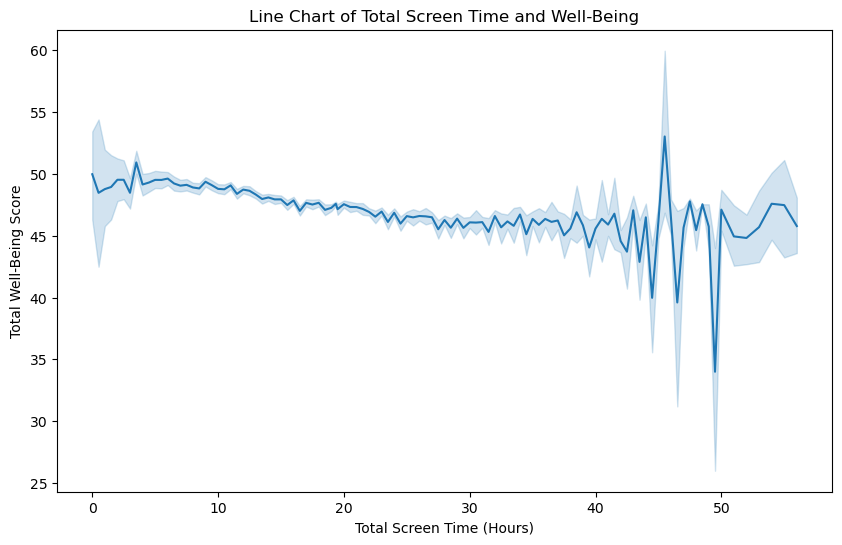

In [12]:
# Line chart: Total Screen Time and Well-Being
plt.figure(figsize=(10, 6))
sns.lineplot(x='total_screen_time', y='composite_wellbeing_score', data=df)
plt.title('Line Chart of Total Screen Time and Well-Being')
plt.xlabel('Total Screen Time (Hours)')
plt.ylabel('Total Well-Being Score')
plt.show()


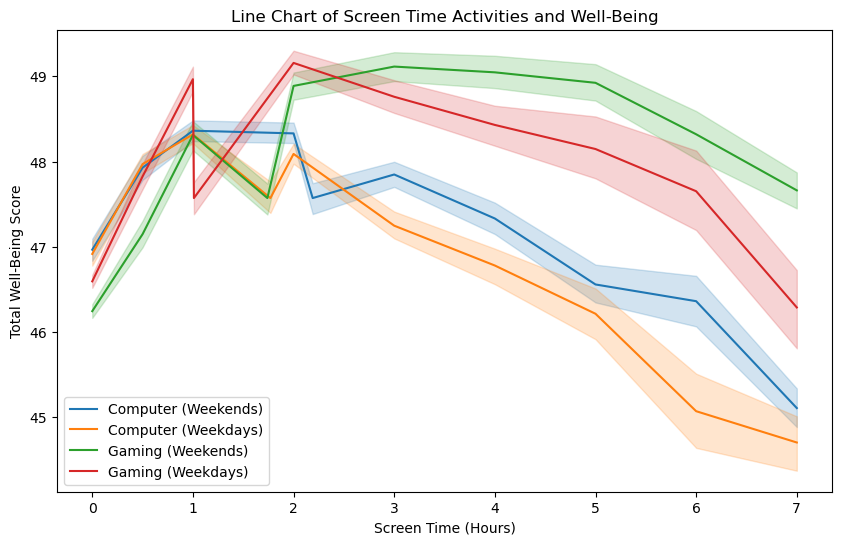

In [13]:
# Line charts for individual screen time activities and well-being
plt.figure(figsize=(10, 6))
sns.lineplot(x='C_we', y='composite_wellbeing_score', data=df, label='Computer (Weekends)')
sns.lineplot(x='C_wk', y='composite_wellbeing_score', data=df, label='Computer (Weekdays)')
sns.lineplot(x='G_we', y='composite_wellbeing_score', data=df, label='Gaming (Weekends)')
sns.lineplot(x='G_wk', y='composite_wellbeing_score', data=df, label='Gaming (Weekdays)')
plt.title('Line Chart of Screen Time Activities and Well-Being')
plt.xlabel('Screen Time (Hours)')
plt.ylabel('Total Well-Being Score')
plt.legend()
plt.show()

### 4. Modeling using Linear Regression to predict well-being scores based on screen time.
#### - Splitting the Data: Dividing the data into training and testing sets.
#### - Building the Model: Fitting a linear regression model.
#### - Interpreting Coefficients: Understanding the impact of each feature on the well-being score.
#### - Model Validation: Using metrics like R-squared and RMSE to evaluate the model.

In [13]:
# Exclude the ID column from the analysis if it exists
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

In [14]:
# Prepare the features (X) and target (y)
# Using screen time and demographic variables (excluding 'ID')
features = ['total_screen_time', 'screen_time_ratio_computer', 'screen_time_ratio_gaming', 
            'screen_time_ratio_smartphone', 'screen_time_ratio_tv', 
            'gender', 'minority', 'deprived']
X = df[features].values
y = df['composite_wellbeing_score'].values

In [15]:
# Split dataset into 60% training and 40% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [16]:
# Build a linear regression model
model = LinearRegression()

In [17]:
# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  47.51554990038427
Coefficient:  [-0.12811044  0.42829577  0.10301676  0.15572358 -0.01322892  4.3853451
  0.10448779 -0.175857  ]


In [19]:
# Use linear regression to predict the values of (y) in the test set
y_pred = model.predict(X_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(df_pred.head())

   Actual  Predicted
0   47.54      49.92
1   53.00      46.78
2   41.00      47.86
3   41.00      45.59
4   46.00      50.64


In [20]:
# Compute standard performance metrics of the linear regression:

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
# Root Mean Square Error
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Normalized Root Mean Square Error
y_max = y.max()
y_min = y.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test, y_pred)

print("\nLinear Regression Model Performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalized): ", rmse_norm)
print("R^2: ", r_2)


Linear Regression Model Performance:
MAE:  6.446436500822294
MSE:  71.72760985702656
RMSE:  8.469215421573983
RMSE (Normalized):  0.151235989670964
R^2:  0.07775333715830113


##### """ COMPARE THE PERFORMANCE OF THE LINEAR REGRESSION MODEL VS. A DUMMY MODEL (BASELINE) THAT USES MEAN AS THE BASIS OF ITS PREDICTION """

In [ ]:
# Compute mean of values in (y) training set
y_base = np.mean(y_train)

# Replicate the mean values as many times as there are values in the test set
y_pred_base = [y_base] * len(y_test)

# Show the predicted values of (y) next to the actual values of (y)
df_base_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_base})
print(df_base_pred.head())

# Compute standard performance metrics of the baseline model:

# Mean Absolute Error
mae_base = metrics.mean_absolute_error(y_test, y_pred_base)
# Mean Squared Error
mse_base = metrics.mean_squared_error(y_test, y_pred_base)
# Root Mean Square Error
rmse_base = math.sqrt(metrics.mean_squared_error(y_test, y_pred_base))
# Normalized Root Mean Square Error
rmse_norm_base = rmse_base / (y_max - y_min)

# R-Squared
r_2_base = metrics.r2_score(y_test, y_pred_base)

print("\nBaseline Model Performance:")
print("MAE: ", mae_base)
print("MSE: ", mse_base)
print("RMSE: ", rmse_base)
print("RMSE (Normalized): ", rmse_norm_base)
print("R^2: ", r_2_base)

In [28]:
# Another example of Linear Regression

# Separate explanatory variables (x) from the response variable (y)
x = df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].values  # Screen time variables
y = df['composite_wellbeing_score'].values  # Well-being score

# Split dataset into 60% training and 40% test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Build a linear regression model
model = LinearRegression()

# Train (fit) the linear regression model using the training set
model.fit(X_train, y_train)

# Print the intercept and coefficient learned by the linear regression model
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Use linear regression to predict the values of (y) in the test set based on the values of x in the test set
y_pred = model.predict(X_test)

# Show the predicted values of (y) next to the actual values of (y)
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(df_pred)

# Compute standard performance metrics of the linear regression:

# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
# Root Mean Square Error (RMSE)
rmse = math.sqrt(mse)
# Normalised Root Mean Square Error
y_max = y.max()
y_min = y.min()
rmse_norm = rmse / (y_max - y_min)

# R-Squared
r_2 = metrics.r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalised): ", rmse_norm)
print("R^2: ", r_2)

"""
COMPARE THE PERFORMANCE OF THE LINEAR REGRESSION MODEL
VS.
A DUMMY MODEL (BASELINE) THAT USES MEAN AS THE BASIS OF ITS PREDICTION
"""

# Compute mean of values in (y) training set
y_base = np.mean(y_train)

# Replicate the mean values as many times as there are values in the test set
y_pred_base = [y_base] * len(y_test)

# Optional: Show the predicted values of (y) next to the actual values of (y)
df_base_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_base})
print(df_base_pred)

# Compute standard performance metrics of the baseline model:

# Mean Absolute Error (MAE)
mae_base = metrics.mean_absolute_error(y_test, y_pred_base)
# Mean Squared Error (MSE)
mse_base = metrics.mean_squared_error(y_test, y_pred_base)
# Root Mean Square Error (RMSE)
rmse_base = math.sqrt(mse_base)
# Normalised Root Mean Square Error
rmse_norm_base = rmse_base / (y_max - y_min)

# R-Squared
r_2_base = metrics.r2_score(y_test, y_pred_base)

print("Baseline Model Performance:")
print("MAE: ", mae_base)
print("MSE: ", mse_base)
print("RMSE: ", rmse_base)
print("RMSE (Normalised): ", rmse_norm_base)
print("R^2: ", r_2_base)

Intercept:  49.824619467694774
Coefficient:  [-0.17771038 -0.03677419  0.42643403 -0.12971612 -0.22894396 -0.25739446
 -0.16610547 -0.10578373]
       Actual  Predicted
0       47.54      46.24
1       53.00      49.20
2       41.00      44.11
3       41.00      47.55
4       46.00      48.13
...       ...        ...
48041   47.54      46.46
48042   47.54      48.98
48043   34.00      45.02
48044   56.00      48.11
48045   26.00      46.28

[48046 rows x 2 columns]
Linear Regression Model Performance:
MAE:  6.48390629046773
MSE:  75.10549655045105
RMSE:  8.666342743652079
RMSE (Normalised):  0.15475612042235856
R^2:  0.034321738967901694
       Actual  Predicted
0       47.54      47.55
1       53.00      47.55
2       41.00      47.55
3       41.00      47.55
4       46.00      47.55
...       ...        ...
48041   47.54      47.55
48042   47.54      47.55
48043   34.00      47.55
48044   56.00      47.55
48045   26.00      47.55

[48046 rows x 2 columns]
Baseline Model Performance:


### 5. Model optimisation
#### - Non-linear transformation using statsmodels
#### - Remove multicollinearity
#### - Rescale technique using z-score standardisation
#### - Gaussian transformation


In [ ]:
# Remove multicollinearity technique

# compute the correlation matrix
corr = df.corr()

# plot the matric as a heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=False,
    annot=True
)

# customise the labels
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment = "right"
)
plt.show()

# build the original multiple linear regression

x = df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].values  # Screen time variables
y = df['composite_wellbeing_score'].values  # Well-being score

# build the linear regression using statsmodels
X = sm.add_constant(X)
model= sm.OLS(y, X).fit()
model_report = model.summary()
print(model_report)

In [ ]:
# Using z-score standardisation to optimisation the model


# Composite Well-Being Score (sum of well-being indicators)
wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 
                     'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
df['composite_wellbeing_score'] = df[wellbeing_columns].sum(axis=1)

# Original multiple linear regression
X = df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']]  # Screen time variables
y = df['composite_wellbeing_score']  # Well-being score

# Add a constant for intercept in statsmodels
X = sm.add_constant(X)

# Convert X to DataFrame to allow for column manipulation
X_df = pd.DataFrame(X)

# Build the linear regression using statsmodels
model = sm.OLS(y, X_df).fit()
model_report = model.summary()
print("Original Model Summary:")
print(model_report)

# Apply z-score standardization (excluding the constant column)
scaler = StandardScaler()

# Standardize the screen time variables (without the constant)
X_std = scaler.fit_transform(X_df.drop(columns=['const']))

# Convert back to DataFrame
X_std_df = pd.DataFrame(X_std, index=X_df.index, columns=X_df.columns[1:])  # Exclude 'const' in the columns

# Add the constant back after standardization
X_std_df = sm.add_constant(X_std_df)

# Rebuild the linear regression using statsmodels with standardized data
model_std = sm.OLS(y, X_std_df).fit()
model_std_report = model_std.summary()
print("Standardized Model Summary:")
print(model_std_report)
